# CRITICAL TEMPERATURE

This tutorial shows how thermal noise can affect the quality of the entanglement, leading eventually to a critical temperature where the entanglement compeletely vanishes. This tutorial assumes that the basic_tutorial has already been seen.

In [9]:
import sys
import os
repoRoot = os.path.abspath(os.path.join('..'))
sys.path.append(repoRoot)

from src.LogNegManager import LogNegManager
from src.TypesAndParameters import TypeOfMeasurement, InitialStateParameters, TransformationMatrixParameters, MeasurementParameters, GeneralOptionsParameters

## Stating the parameters of the simulation and the measurements

We will define the same kind of parameters as before but only for thermal states of different temperature. We will explore also different kind of bipartitions to see which resists better to thermal noise.

In [10]:
generalOptions =  {
        GeneralOptionsParameters.NUM_MODES.value: 10,
        GeneralOptionsParameters.PLOTS_DIRECTORY.value: "./plots/10-plots/",
        GeneralOptionsParameters.DATA_DIRECTORY.value: "./data/10-data/",
        GeneralOptionsParameters.BASE_DIRECTORY.value: "../",
        GeneralOptionsParameters.PARALLELIZE.value: True
      }

transformationMatrixOptions = {
        TransformationMatrixParameters.DATA_DIRECTORY.value: "../example_data/10modes/",
        TransformationMatrixParameters.INSTANT_TO_PLOT.value: -1
      }

initialStates = [
          {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}, # Vacuum

            {InitialStateParameters.TEMPERATURE.value:  0.1,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

            {InitialStateParameters.TEMPERATURE.value:  0.5,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

            {InitialStateParameters.TEMPERATURE.value:  1.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

            {InitialStateParameters.TEMPERATURE.value:  1.5,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

            {InitialStateParameters.TEMPERATURE.value:  1.75,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},


        ]

measurements = [
        {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value}, # 1 vs (N-1) LogNeg for all modes onto the out state

        {MeasurementParameters.TYPE.value: TypeOfMeasurement.HighestOneByOne.value},  # Highest 1 vs 1 Log Neg contribution for each mode onto the out state
      ]

## Perform the measurements

In [11]:
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions, initialStates=initialStates)

collection_of_dict_to_plot = []
for measurement in measurements:
    collection_of_dict_to_plot.append(LNManager.measureEntanglement(measurement))

## Visualize the results


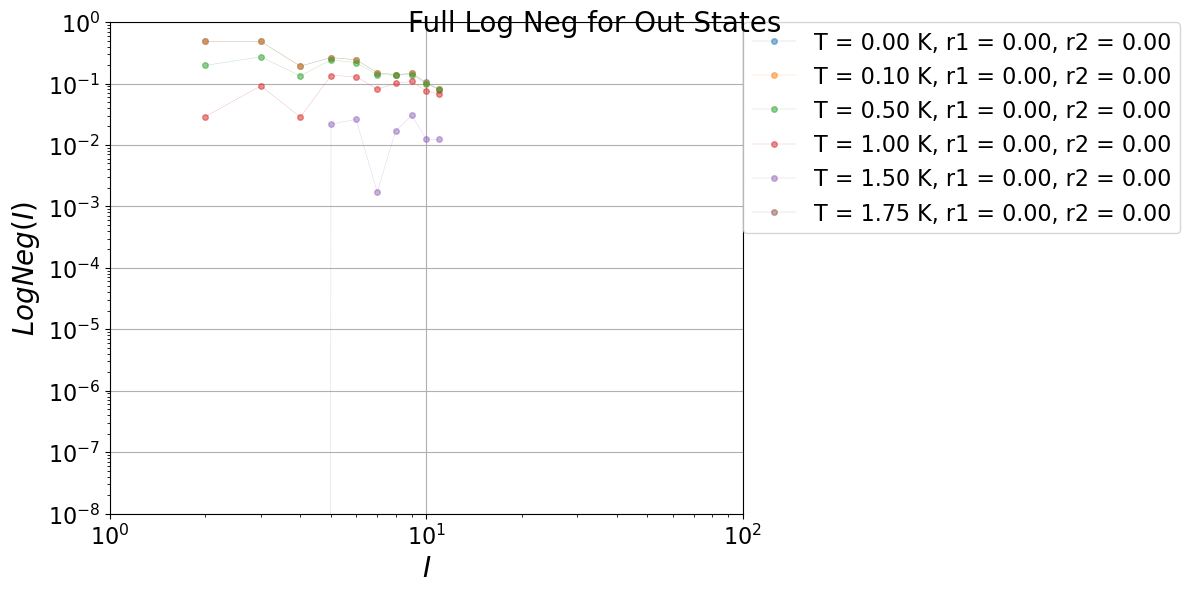

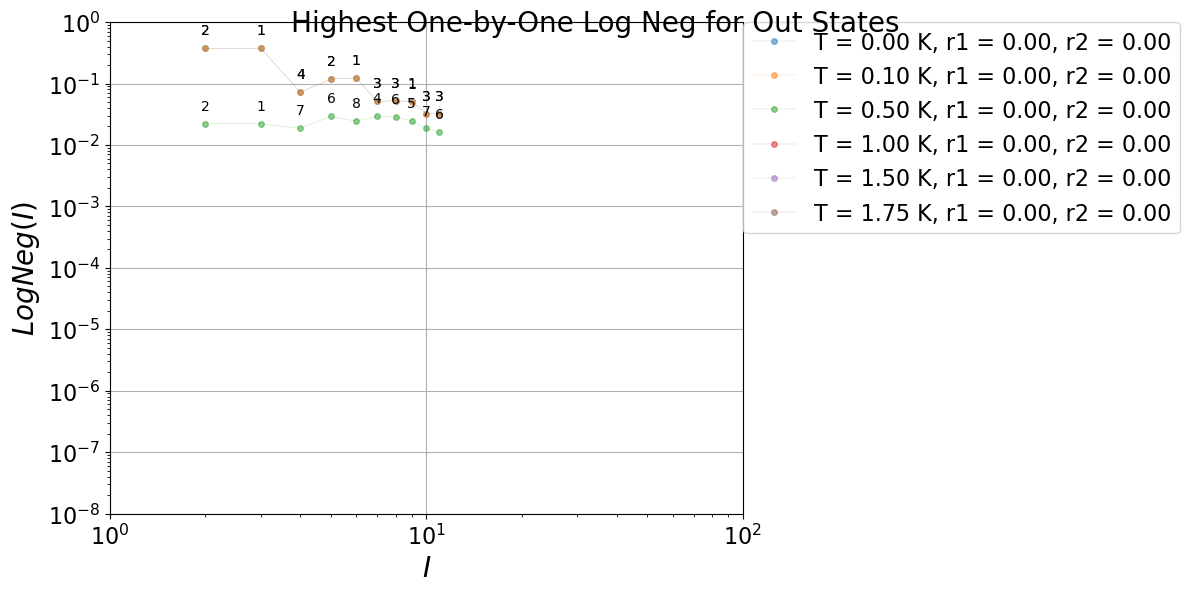

In [12]:
for dict_to_plot in collection_of_dict_to_plot:
    LNManager.plotResults(dict_to_plot)